## 图像复原
1. 了解图像的退化模型和复原原理；
2. 了解图像维纳滤波和正则化滤波的原理，掌握图像维纳滤波和正则化滤波的Python实现方法；
3. 了解运动模糊退化及去噪复原原理，掌握运动模糊退化及去噪复原的Python实现方法

Text(0.5, 1.0, 'lenaWiener')

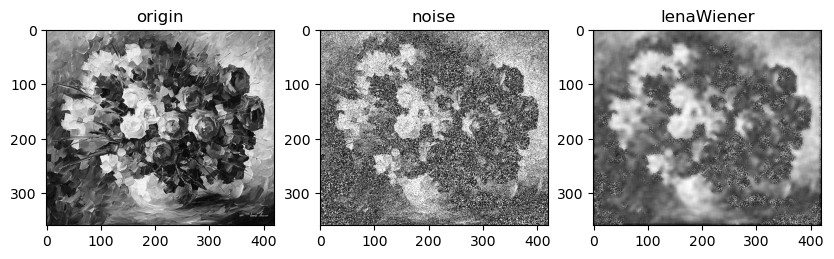

In [3]:
# 维纳滤波
from scipy.signal import wiener
import cv2 
import numpy as np
import matplotlib.pyplot as plt
def gasuss_noise(image,mean=0,var=0.03):
    image = np.array(image/255,dtype=float)
    noise = np.random.normal(mean,var ** 0.5,image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1
    else:
        low_clip = 0
#       clip  限定最小值 最大值
    out = np.clip(out,low_clip,1.0)
    out = np.uint8(out*255)
    return out 

# 读取灰度图
img = cv2.imread("flower.jpg",0)
# 添加高斯噪声
img_noise = gasuss_noise(img)
# 维纳滤波
lenaNoise = img_noise.astype('float64')
lenaWiener = wiener(lenaNoise,[9,9])
lenaWiener = np.uint8(lenaWiener/lenaWiener.max() * 255)
fig,axes = plt.subplots(1,3,figsize=(10,8),dpi = 100)
axes[0].imshow(img,"gray")
axes[0].set_title("origin")
axes[1].imshow(img_noise,"gray")
axes[1].set_title("noise")
axes[2].imshow(lenaWiener,"gray")
axes[2].set_title("lenaWiener")